In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
file = 'Otodom_3p'
df = pd.read_csv(file + '.csv')
df.shape

(117, 14)

In [54]:
df.dtypes

time_scraping              object
otodom_id                  object
price                      object
title                      object
surface_area               object
num_of_room               float64
floor                      object
form_of_property           object
finish_condition           object
balcony_garden_terrace    float64
parking_space              object
heating                    object
ad_link                    object
map_link                   object
dtype: object

In [55]:

# Generate random integers between 1 and 5 of the same length as the number of missing values in 'num_of_room'
random_values = np.random.randint(1, 6, size=df['num_of_room'].isnull().sum())

# Create a Series from the random values with the same index as the missing values in 'num_of_room'
random_values_series = pd.Series(random_values, index=df.loc[df['num_of_room'].isnull(), 'num_of_room'].index)

# Fill the missing values in 'num_of_room' with the random values
df['num_of_room'].fillna(random_values_series, inplace=True)

df['num_of_room'] = df['num_of_room'].astype(int)

In [56]:
# Define the list of choices
choices = ['Balkon', 'Taras', 'Garaz', 'Plwnica', 'Winda']

# Function to generate a string of random choices
def generate_random_choices(num_choices):
    return ', '.join(np.random.choice(choices, size=num_choices))

# Generate a string of random choices for each missing value in 'balcony_garden_terrace'
random_values = [generate_random_choices(np.random.randint(1, 4)) for _ in range(df['balcony_garden_terrace'].isnull().sum())]

# Create a Series from the random values with the same index as the missing values in 'balcony_garden_terrace'
random_values_series = pd.Series(random_values, index=df.loc[df['balcony_garden_terrace'].isnull(), 'balcony_garden_terrace'].index)

# Fill the missing values in 'balcony_garden_terrace' with the random values
df['balcony_garden_terrace'].fillna(random_values_series, inplace=True)

C:\Users\Purn\AppData\Local\Temp\ipykernel_23516\3445681054.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Balkon, Balkon, Plwnica' 'Plwnica, Taras' 'Winda, Taras' 'Winda, Taras'
 'Balkon, Plwnica, Winda' 'Garaz, Garaz' 'Balkon, Balkon, Balkon'
 'Garaz, Balkon' 'Garaz, Winda, Taras' 'Taras, Garaz, Winda'
 'Winda, Balkon, Plwnica' 'Winda, Winda' 'Balkon' 'Plwnica, Plwnica'
 'Garaz' 'Garaz' 'Plwnica, Balkon, Garaz' 'Garaz, Balkon' 'Garaz' 'Taras'
 'Taras, Taras' 'Plwnica' 'Taras' 'Taras, Balkon'
 'Plwnica, Plwnica, Taras' 'Balkon, Taras, Winda' 'Winda, Winda, Plwnica'
 'Garaz, Balkon' 'Winda, Garaz, Balkon' 'Taras, Plwnica, Plwnica'
 'Balkon, Winda, Winda' 'Winda' 'Winda, Garaz' 'Plwnica, Balkon, Taras'
 'Plwnica, Garaz' 'Taras, Taras' 'Garaz' 'Winda, Plwnica, Balkon'
 'Taras, Taras' 'Winda, Winda, Winda' 'Winda' 'Plwnica, Garaz, Winda'
 'Taras, Balkon' 'Garaz, Plwnica, Garaz' 'Winda, Balkon, Garaz'
 'Winda, 

In [57]:
df.isnull().sum()

time_scraping              0
otodom_id                  0
price                      0
title                      0
surface_area               0
num_of_room                0
floor                      4
form_of_property          21
finish_condition          13
balcony_garden_terrace     0
parking_space             48
heating                   26
ad_link                    0
map_link                   0
dtype: int64

In [58]:
# df['price'] = df['price'].str.replace('zł', '').str.replace(' ', '').str.replace(',', '.').astype(int) # error when 'ask' in price
df['price'] = pd.to_numeric(df['price'].str.replace('zł', '').str.replace(' ', ''), errors='coerce').astype('Int64')

In [59]:
df['surface_area'] = pd.to_numeric(df['surface_area'].str.replace(',', '.').str.replace('m²', '').str.replace(' ', ''), errors='coerce')

In [60]:
# Split the 'floor' column
df[['floor', 'num_floors_in_building']] = df['floor'].str.split('/', expand=True)

# Replace 'parter' with 0 in the 'floor' column
df['floor'] = df['floor'].replace('parter', '0').replace('> 10', '11')

# Convert 'floor' and 'num_floors_in_building' to numeric
df['floor'] = pd.to_numeric(df['floor'], errors='coerce').astype('Int16')
df['num_floors_in_building'] = pd.to_numeric(df['num_floors_in_building'], errors='coerce').astype('Int16')

In [61]:
df['num_of_room'] = df['num_of_room'].astype('Int16')

In [62]:
# Create a dictionary of Polish words and their English translations
translation_dict = {
    'spółdzielcze wł. prawo do lokalu': 'cooperative ownership right to the premises',
    'pełna własność': 'full ownership',

    'do zamieszkania': 'for living',
    'do wykończenia': 'for finishing',
    'do remontu': 'for renovation',

    'Winda': 'Elevator',
    'Plwnica': 'Laundry',
    'Balkon': 'Balcony',
    'Taras': 'Terrace',
    'Garaz': 'Garage',

    'garaż/miejsce parkingowe': 'garage/parking space',

    'miejskie': 'municipal',
    'gazowe': 'gas',
    'kotłownia': 'boiler room',
    'elektryczne': 'electric',
    'inne': 'other',
}

# Replace the Polish words with the English translations in the DataFrame
df.replace(translation_dict, inplace=True)

In [63]:
print('\nFORM-OF-PROPERTY')
print(df['form_of_property'].value_counts())
print('\nFINISH-CONDITION')
print(df['finish_condition'].value_counts())
print('\nBALCONY-GARDEN-TERRACE')
print(df['balcony_garden_terrace'].value_counts())


FORM-OF-PROPERTY
form_of_property
full ownership                                 91
cooperative ownership right to the premises     5
Name: count, dtype: int64

FINISH-CONDITION
finish_condition
for living        82
for finishing     16
for renovation     6
Name: count, dtype: int64

BALCONY-GARDEN-TERRACE
balcony_garden_terrace
Garage                   12
Terrace                   8
Laundry                   6
Taras, Taras              5
Elevator                  5
                         ..
Garaz, Plwnica, Garaz     1
Winda, Garaz, Plwnica     1
Winda, Balkon             1
Balkon, Balkon, Winda     1
Balkon, Taras             1
Name: count, Length: 62, dtype: int64


In [64]:
print('\nPARKING-SPACE')
print(df['parking_space'].value_counts())
print('\nHEATING')
print(df['heating'].value_counts())


PARKING-SPACE
parking_space
garage/parking space    69
Name: count, dtype: int64

HEATING
heating
municipal      76
gas            10
boiler room     2
electric        2
other           1
Name: count, dtype: int64


In [65]:
# Extract the latitude and longitude from the 'map_link' column
df[['latitude', 'longitude']] = df['map_link'].str.extract('@(.*?),(.*?),', expand=True)

# Convert 'latitude' and 'longitude' to numeric
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

In [66]:
df.head(5)

,time_scraping,otodom_id,price,title,surface_area,num_of_room,floor,form_of_property,finish_condition,balcony_garden_terrace,parking_space,heating,ad_link,map_link,num_floors_in_building,latitude,longitude
0,2024-06-06 01:31:51,2-pokojowe-mieszkanie-35m2-loggia-bezposrednio...,<NA>,2-pokojowe mieszkanie 35m2 + loggia Bezpośrednio,35.41,3,3,full ownership,for finishing,"Balkon, Balkon, Plwnica",garage/parking space,NaN,https://www.otodom.pl/pl/oferta/2-pokojowe-mie...,"https://www.google.com/maps/@52.172792,20.9941...",8,52.172792,20.994102
1,2024-06-06 01:31:56,bezposr-2pok-metro-wilanowska-cena-do-negocjac...,970000,Bezpośr. 2pok. Metro Wilanowska CENA DO NEGOCJ...,48.55,1,7,full ownership,for living,"Plwnica, Taras",garage/parking space,municipal,https://www.otodom.pl/pl/oferta/bezposr-2pok-m...,"https://www.google.com/maps/@52.1823249,21.025...",15,52.182325,21.025885
2,2024-06-06 01:32:01,2-pokoje-ul-lindego-metro-wawrzyszew-ID4qUHs,629000,"2 pokoje, ul. Lindego, Metro Wawrzyszew",36.50,3,0,full ownership,for living,"Winda, Taras",NaN,municipal,https://www.otodom.pl/pl/oferta/2-pokoje-ul-li...,"https://www.google.com/maps/@52.2869133,20.940...",10,52.286913,20.940933
3,2024-06-06 01:32:08,piekne-ciche-100m-w-kamienicy-powisle-metro-80...,2480000,"Piękne, ciche 100m w kamienicy. Powiśle metro ...",99.69,3,3,cooperative ownership right to the premises,for living,"Winda, Taras",NaN,municipal,https://www.otodom.pl/pl/oferta/piekne-ciche-1...,"https://www.google.com/maps/@52.23805,21.02935...",4,52.238050,21.029350
4,2024-06-06 01:32:12,niski-czynsz-ip-winda-ID4qWEi,560000,Niski Czynsz // Ip. // Winda,50.00,4,1,NaN,NaN,"Balkon, Plwnica, Winda",garage/parking space,NaN,https://www.otodom.pl/pl/oferta/niski-czynsz-i...,"https://www.google.com/maps/@52.4465078,20.692...",5,52.446508,20.692522


In [67]:
df.sample(5)

,time_scraping,otodom_id,price,title,surface_area,num_of_room,floor,form_of_property,finish_condition,balcony_garden_terrace,parking_space,heating,ad_link,map_link,num_floors_in_building,latitude,longitude
74,2024-06-06 01:37:46,loft-garden-wesola-etap-ii-ID4m4LM,1077000,Loft Garden Wesoła - ETAP II,82.87,3,<NA>,NaN,NaN,"Plwnica, Taras",garage/parking space,NaN,https://www.otodom.pl/pl/oferta/loft-garden-we...,"https://www.google.com/maps/@52.24892,21.19751...",<NA>,52.248920,21.197510
15,2024-06-06 01:33:03,okazja-3-4-lub-nawet-5-pokojowe-mieszkanie-ID4...,1400000,"Okazja! 3-,4-, lub nawet 5-pokojowe mieszkanie",116.00,5,7,full ownership,for living,Garage,garage/parking space,municipal,https://www.otodom.pl/pl/oferta/okazja-3-4-lub...,"https://www.google.com/maps/@52.13633,21.04971...",11,52.136330,21.049710
16,2024-06-06 01:33:08,okazja-3-4-lub-nawet-5-pokojowe-mieszkanie-ID4...,1400000,"Okazja! 3-,4-, lub nawet 5-pokojowe mieszkanie",116.00,1,7,full ownership,for living,"Plwnica, Balkon, Garaz",garage/parking space,municipal,https://www.otodom.pl/pl/oferta/okazja-3-4-lub...,"https://www.google.com/maps/@52.13633,21.04971...",11,52.136330,21.049710
18,2024-06-06 01:33:17,2-pokojowy-apartament-na-mokotowie-ID4qWCX,949000,2 pokojowy Apartament na Mokotowie,44.97,1,1,full ownership,for living,Garage,NaN,municipal,https://www.otodom.pl/pl/oferta/2-pokojowy-apa...,"https://www.google.com/maps/@52.1843537,20.993...",8,52.184354,20.993499
38,2024-06-06 01:34:51,waraszaw-rembertow-piekne-3pok-poddasze101m2-I...,1450000,Waraszaw-Rembertów/Piękne 3pok.+poddasze=101m2,101.36,1,1,full ownership,for living,"Taras, Taras",garage/parking space,gas,https://www.otodom.pl/pl/oferta/waraszaw-rembe...,"https://www.google.com/maps/@52.2715718,21.158...",2,52.271572,21.158728


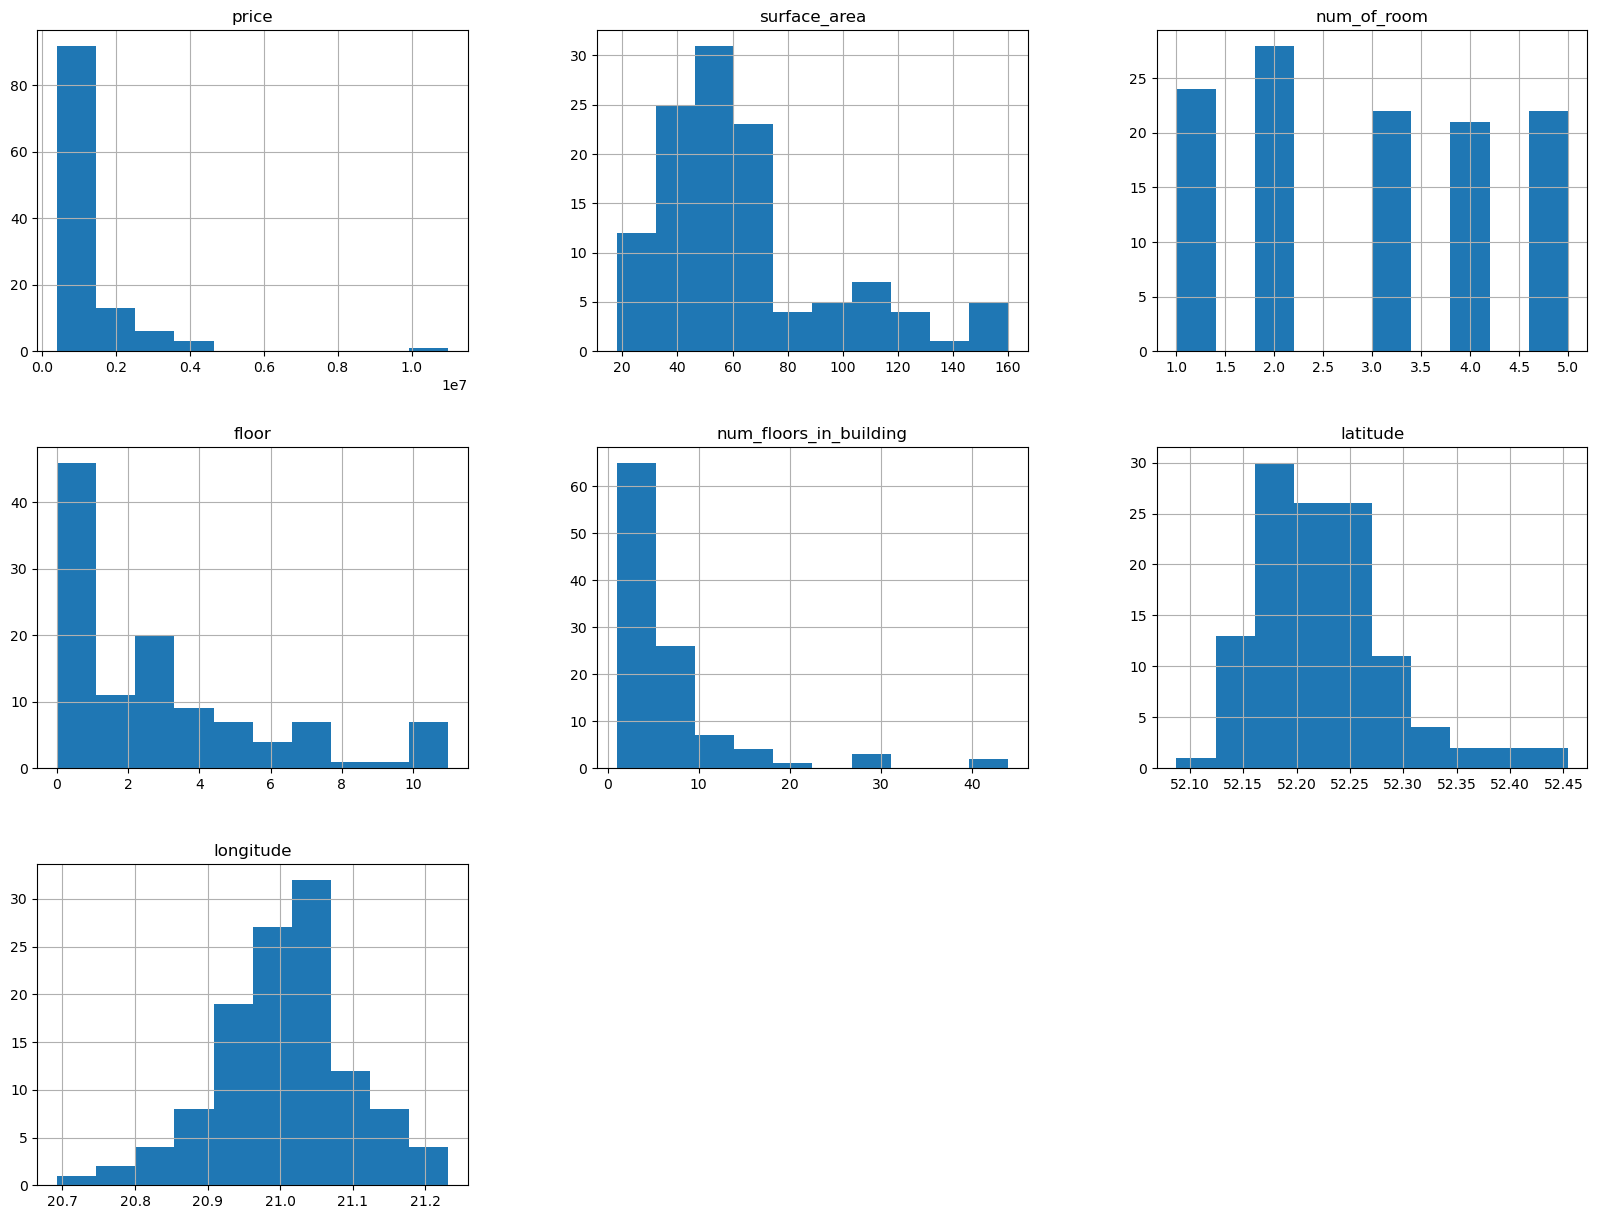

In [68]:
import matplotlib.ticker as ticker

ax = df.hist(figsize=(20,15))

# for sub_ax in ax.flatten():
#     sub_ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

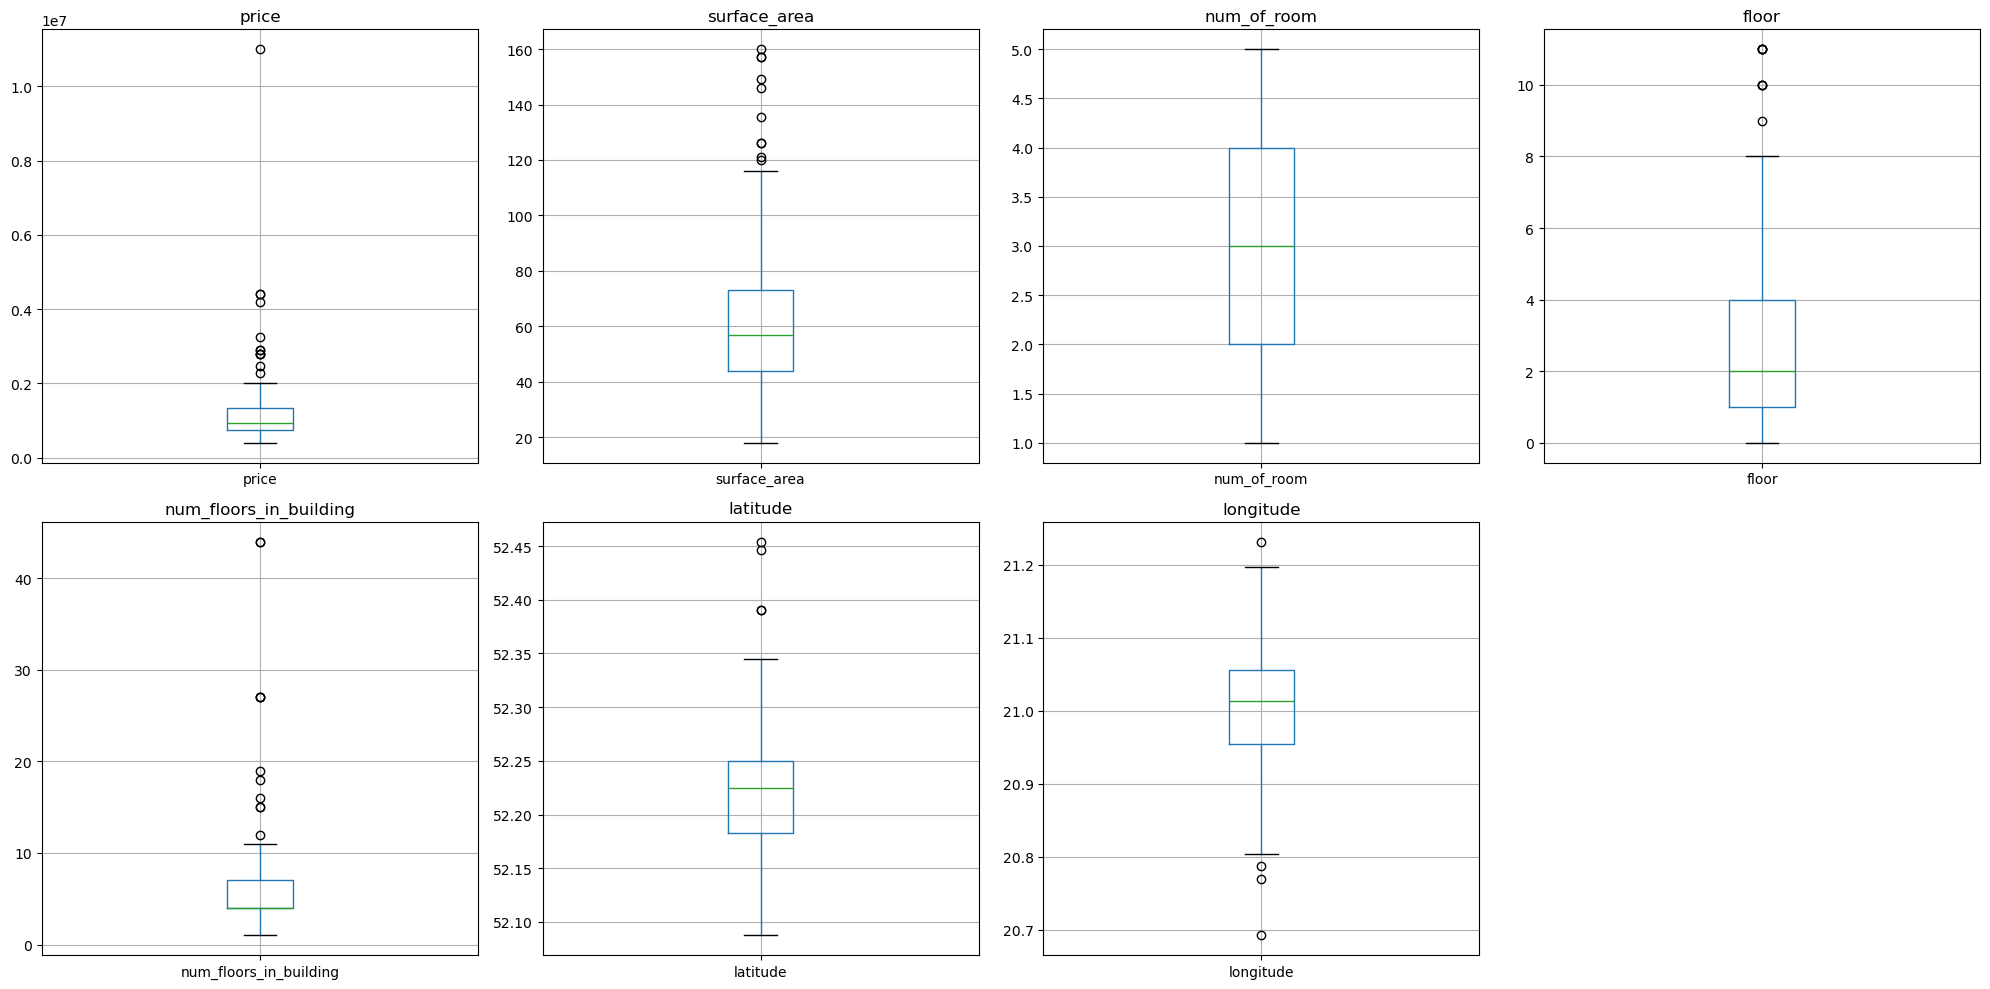

In [69]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number])

# Number of columns and rows for the subplot grid
num_cols = 4
num_rows = int(np.ceil(len(numerical_cols.columns) / num_cols))

# Create a figure and axes with a subplot for each column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows*5))

# Loop over the columns and create a boxplot for each one
for i, col in enumerate(numerical_cols.columns):
    ax = axs[i//num_cols, i%num_cols]
    numerical_cols[[col]].boxplot(ax=ax)
    ax.set_title(col)

# Remove empty subplots
if len(numerical_cols.columns) % num_cols != 0:
    for ax in axs.flatten()[len(numerical_cols.columns):]:
        ax.remove()

# Show the plot
plt.tight_layout()
plt.show()

In [70]:
df = df.drop(['time_scraping', 'otodom_id', 'title', 'ad_link', 'map_link'], axis=1)

In [71]:
df.head(1)

,price,surface_area,num_of_room,floor,form_of_property,finish_condition,balcony_garden_terrace,parking_space,heating,num_floors_in_building,latitude,longitude
0,<NA>,35.41,3,3,full ownership,for finishing,"Balkon, Balkon, Plwnica",garage/parking space,NaN,8,52.172792,20.994102


In [72]:
new_columns_order = ['price', 'latitude', 'longitude', 'surface_area', 'num_of_room', 'floor', 'num_floors_in_building', 'finish_condition', 'form_of_property', 'balcony_garden_terrace', 'parking_space',	'heating']
df = df[new_columns_order]

In [74]:
df.to_csv(file + '_cleaned.csv', index=False)